# 합성곱 신경망

In [1]:
import numpy as np

In [2]:
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [3]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [4]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))

[63]
[48]
[49]
[28]
[21]
[20]


In [5]:
from scipy.signal import convolve

In [6]:
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [7]:
from scipy.signal import correlate

In [8]:
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [9]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [10]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [11]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [12]:
from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [13]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [14]:
from scipy.signal import convolve2d

convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [15]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [53]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

(1, 3, 3, 1)


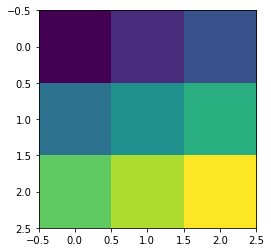

In [17]:
plt.imshow(image.numpy().reshape(3,3))

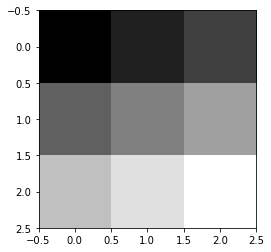

In [18]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


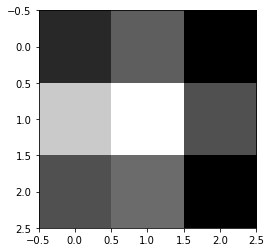

In [19]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

In [26]:
import numpy as np
a = np.array([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]])
print(a.shape)

for i in a:
    print(i.reshape(3,3))

(1, 3, 3, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


image.shpe (1, 3, 3, 1)
weight.shpe (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


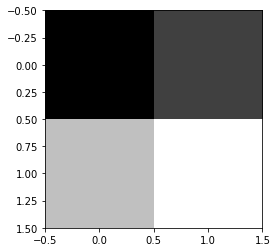

In [21]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')

conv2d.shape (1, 3, 3, 1)
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


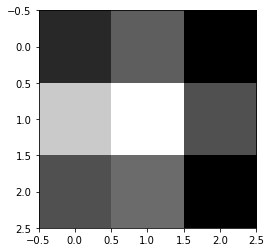

In [46]:
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


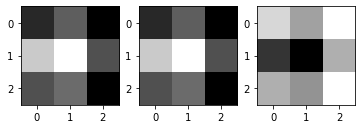

In [55]:
print("image.shape", image.shape)
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,1,1],[2,2,2],[3,3,3]],
                      [[4,4,4],[5,5,5],[6,6,6]],
                      [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print(image.shape)
weight = np.array([[[[1],[2],[3]],[[1],[2],[3]]],[[[1],[2],[3]],[[1],[2],[3]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d)
# feature_maps = np.swapaxes(conv2d, 0, 3)
# for i, feature_map in enumerate(feature_maps):
#     print(feature_map.reshape(3,3))
#     plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
# plt.show()

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d.shape (1, 3, 3, 1)
tf.Tensor(
[[[[ 72.]
   [ 96.]
   [ 54.]]

  [[144.]
   [168.]
   [ 90.]]

  [[ 90.]
   [102.]
   [ 54.]]]], shape=(1, 3, 3, 1), dtype=float32)


In [2]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                      [[4,4,4],[5,5,5],[6,6,6]],
                      [[7,7,7],[8,8,8],[9,9,9]]]])
print(image.shape)
# (1,3,3,3)
image = np.swapaxes(image, 0, 3)
print(image.shape)
# (3,3,3,1)
for a in image:
    print( a.shape)
    print( a.reshape(3,3) )

(1, 3, 3, 3)
(3, 3, 3, 1)
(3, 3, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
weight = np.array([[[[1],[2],[3]],[[1],[2],[3]]],[[[1],[2],[3]],[[1],[2],[3]]]])
print("weight.shape", weight.shape)
# (2,2,3,1)
weight = np.transpose(weight, (2,0,1,3))
print(weight.shape)
# (3,2,2,1)
for a in weight:
    print( a.shape)
    print( a.reshape(2,2) )

weight.shape (2, 2, 3, 1)
(3, 2, 2, 1)
(2, 2, 1)
[[1 1]
 [1 1]]
(2, 2, 1)
[[2 2]
 [2 2]]
(2, 2, 1)
[[3 3]
 [3 3]]


### 다차원 배열의 축교환

In [284]:
import numpy as np
a = np.arange(15).reshape(3,5)
print(np.swapaxes(a, 0, 1))
print(a.T)
np.transpose(a)

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [56]:
import numpy as np
a = np.arange(24).reshape(2,3,4)
np.swapaxes(a,0,1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [57]:
import numpy as np
a = np.arange(24).reshape(2,3,4)
np.swapaxes(a,0,2)

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [58]:
import numpy as np
a = np.arange(24).reshape(2,2,3,2)
np.swapaxes(a,0,1)

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[12, 13],
         [14, 15],
         [16, 17]]],


       [[[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[18, 19],
         [20, 21],
         [22, 23]]]])

In [59]:
import numpy as np
a = np.arange(24).reshape(2,2,3,2)
np.swapaxes(a,0,3)

array([[[[ 0, 12],
         [ 2, 14],
         [ 4, 16]],

        [[ 6, 18],
         [ 8, 20],
         [10, 22]]],


       [[[ 1, 13],
         [ 3, 15],
         [ 5, 17]],

        [[ 7, 19],
         [ 9, 21],
         [11, 23]]]])

In [60]:
import numpy as np
a = np.arange(24).reshape(2,2,3,2)
np.swapaxes(a,1,2)

array([[[[ 0,  1],
         [ 6,  7]],

        [[ 2,  3],
         [ 8,  9]],

        [[ 4,  5],
         [10, 11]]],


       [[[12, 13],
         [18, 19]],

        [[14, 15],
         [20, 21]],

        [[16, 17],
         [22, 23]]]])

In [69]:
weight=np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.shape)
# (2, 2, 1, 3)
weight = np.transpose(weight, (3,0,1,2))
print(weight.shape)
# (3, 2, 2, 1)
for a in weight:
    print( a.shape)
    print( a.reshape(2,2) )

(2, 2, 1, 3)
(3, 2, 2, 1)
(2, 2, 1)
[[1. 1.]
 [1. 1.]]
(2, 2, 1)
[[10. 10.]
 [10. 10.]]
(2, 2, 1)
[[-1. -1.]
 [-1. -1.]]


In [68]:
a = np.arange(12)
a.reshape(3,2,2,1)
# a.reshape(2,2)  reshape은 원소의 개수가 같을 때만 가능하다.

ValueError: cannot reshape array of size 12 into shape (2,2)

(1, 3, 3, 3)
weight.shape (2, 2, 3, 2)
conv2d.shape (1, 3, 3, 2)
[[ 72.  96.  54.]
 [144. 168.  90.]
 [ 90. 102.  54.]]
[[ 72.  96.  54.]
 [144. 168.  90.]
 [ 90. 102.  54.]]


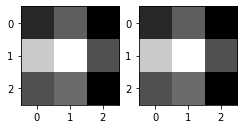

In [7]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,1,1],[2,2,2],[3,3,3]],
                      [[4,4,4],[5,5,5],[6,6,6]],
                      [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print(image.shape)
weight = np.array([[[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]],[[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
# print(conv2d)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [6]:
weight = np.array([[[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]],[[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]]])
print("weight.shape", weight.shape)
# (2, 2, 3, 2)
weight = np.transpose(weight, (3,2,0,1))
print(weight.shape)
# (2, 3, 2, 2)
for a in weight:
    print("필터")
    for b in a:
        print("채널")
        print(b)

weight.shape (2, 2, 3, 2)
(2, 3, 2, 2)
필터
채널
[[1 1]
 [1 1]]
채널
[[2 2]
 [2 2]]
채널
[[3 3]
 [3 3]]
필터
채널
[[1 1]
 [1 1]]
채널
[[2 2]
 [2 2]]
채널
[[3 3]
 [3 3]]


In [9]:
weight=np.array([[[[1,1], [0,1], [-1,-1]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [0,0]]],
 [[[0,0], [-1,0], [0,0]], [[1,1], [1,1], [1,1]], [[0,0], [-1,0], [0,0]]],
 [[[1,1], [1,1], [0,0]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [-1,-1]]]])
print("weight.shape", weight.shape)
# (2, 2, 3, 2)
weight = np.transpose(weight, (3,2,0,1))
print(weight.shape)
# (2, 3, 2, 2)
for a in weight:
    print("필터")
    for b in a:
        print("채널")
        print(b)

weight.shape (3, 3, 3, 2)
(2, 3, 3, 3)
필터
채널
[[1 0 1]
 [0 1 0]
 [1 0 1]]
채널
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
채널
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
필터
채널
[[1 0 1]
 [0 1 0]
 [1 0 1]]
채널
[[1 0 1]
 [0 1 0]
 [1 0 1]]
채널
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [12]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,0,1], [1,1,1], [1,1,1], [0,0,1], [0,1,0]],
  [[0,0,1], [1,1,1], [1,1,1], [1,1,1], [0,0,0]],
  [[0,0,0], [0,0,0], [1,1,0], [1,1,1], [1,0,1]],
  [[0,0,0], [0,0,1], [1,1,1], [1,1,1], [0,1,0]],
  [[0,1,0], [1,1,1], [1,1,1], [0,0,0], [0,0,0]]]]
, dtype=np.float32)
print(image.shape)
weight = np.array([[[[1,1], [0,1], [-1,-1]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [0,0]]],
 [[[0,0], [-1,0], [0,0]], [[1,1], [1,1], [1,1]], [[0,0], [-1,0], [0,0]]],
 [[[1,1], [1,1], [0,0]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [-1,-1]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
# print(conv2d)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
#     plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

(1, 5, 5, 3)
weight.shape (3, 3, 3, 2)
conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


# 풀링 연산

In [13]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


In [14]:
image = tf.constant([[[[1],[2]],[[3],[4]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4.]
   [4.]]

  [[4.]
   [4.]]]]


<class 'numpy.ndarray'>
(28, 28)


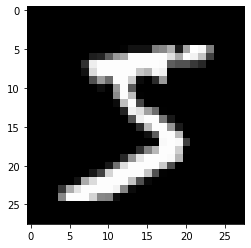

In [17]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
print(type(img))
print(img.shape)
plt.imshow( img, cmap='gray')
plt.show()

(1, 28, 28, 1)
conv2d.shape (1, 14, 14, 5)


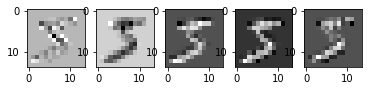

In [18]:
img = img.reshape(-1,28,28,1)
print(img.shape)
img_tf = tf.convert_to_tensor(img)
# print(img_tf.shape)
# print(img_tf)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
# print(weight_init)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
                             strides=(2,2), kernel_initializer=weight_init)(img_tf)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


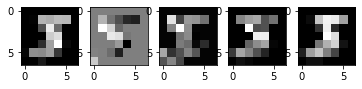

In [292]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()

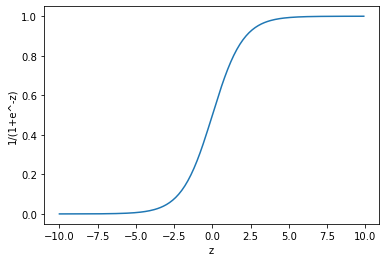

In [19]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

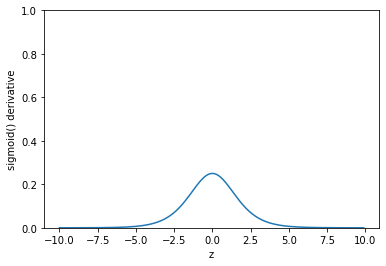

In [20]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

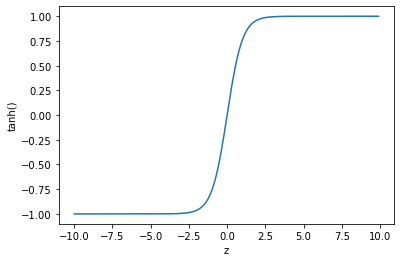

In [21]:
zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

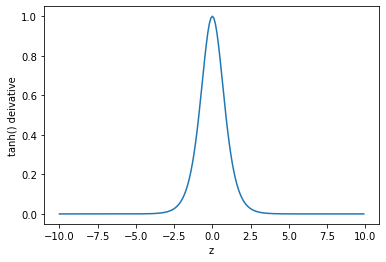

In [22]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ (1-np.tanh(z))*(1+np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

In [23]:
def relu(x):
    return np.maximum(x, 0)

In [24]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

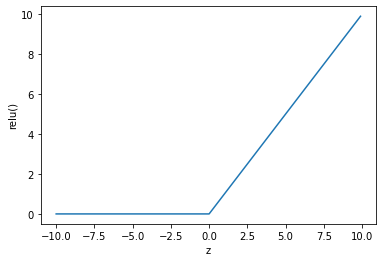

In [25]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [26]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

In [27]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)
#         print('self.conv_w.shape',self.conv_w.shape)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)
#         print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)
#         print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [28]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니댜.
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [29]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([1.99908031e-17 5.43406367e-17 1.47713165e-16], shape=(3,), dtype=float64)


In [31]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [33]:
print(y_train[0])
print(y_train.shape)

6
(48000,)


In [34]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [35]:
print(y_train_encoded[0])
print(y_train_encoded.shape)
print(x_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(48000, 10)
(48000, 28, 28)


In [36]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [38]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [39]:
x_train = x_train / 255
x_val = x_val / 255

In [40]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [42]:
import matplotlib.pyplot as plt

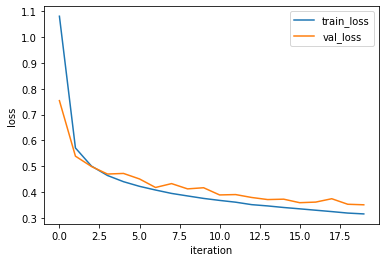

In [43]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [44]:
cn.score(x_val, y_val_encoded)

0.87975

In [41]:
class Connector:
    def __enter__(self):
        print('DB 연결함')
        
    def __exit__(self, type, value, tb):
        print('DB 연결 끊음')

with  Connector()   as   db:
    print('DB 작업중...')
    

DB 연결함
DB 작업중...
DB 연결 끊음


## 케라스로 합성곱 신경망 모델을 만들기

In [352]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [353]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [354]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [355]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [356]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4267 - accuracy: 0.8515 - val_loss: 0.3131 - val_accuracy: 0.8863
Epoch 2/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2909 - accuracy: 0.8944 - val_loss: 0.2829 - val_accuracy: 0.8983
Epoch 3/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2515 - accuracy: 0.9077 - val_loss: 0.2671 - val_accuracy: 0.9029
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2239 - accuracy: 0.9181 - val_loss: 0.2785 - val_accuracy: 0.8988
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2002 - accuracy: 0.9253 - val_loss: 0.2554 - val_accuracy: 0.9098
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1803 - accuracy: 0.9323 - val_loss: 0.2585 - val_accuracy: 0.9118
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1606 - accuracy: 0.9402 - val_loss: 0.2455 - val_ac

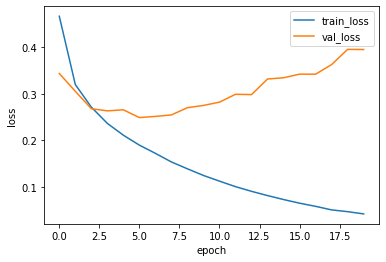

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

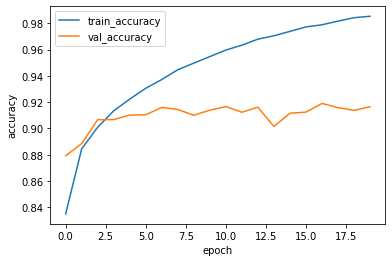

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [63]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [64]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [65]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5338 - accuracy: 0.8104 - val_loss: 0.3700 - val_accuracy: 0.8694
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3953 - accuracy: 0.8572 - val_loss: 0.3186 - val_accuracy: 0.8856
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3493 - accuracy: 0.8712 - val_loss: 0.2879 - val_accuracy: 0.8970
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3176 - accuracy: 0.8830 - val_loss: 0.2745 - val_accuracy: 0.9000
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2963 - accuracy: 0.8902 - val_loss: 0.2712 - val_accuracy: 0.9013
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2797 - accuracy: 0.8950 - val_loss: 0.2610 - val_accuracy: 0.9039
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2661 - accuracy: 0.8995 - val_loss: 0.2563 - val_accuracy:

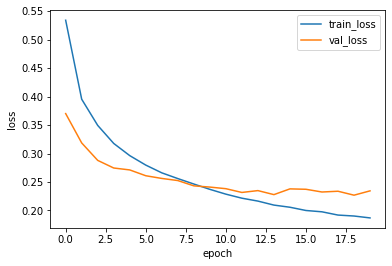

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

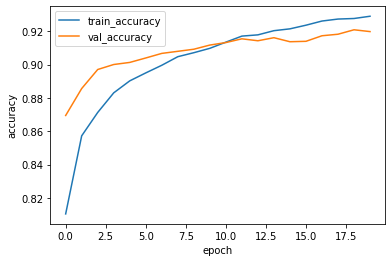

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()